## 1.Loading the Dataset

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

dataset=pd.read_csv(r"C:\Users\hp\Downloads\Fraud_Detection_Dataset\PS_20174392719_1491204439457_log.csv")
dataset.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## 2.Data Preprocessing

In [42]:
# Data Preprocessing

# print("Shape:", dataset.shape)
# print(dataset.info())

print("\nChecking for null values:")
dataset.isnull().sum()
dataset.fillna(0, inplace=True)



Checking for null values:


### 2.1 Unique values

In [43]:
# Check unique values in categorical column
print("\nUnique transaction types:")
print(dataset['type'].unique())

# To list all the columns in the dataset
print(dataset.columns.tolist())


Unique transaction types:
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


## 3.Univarite Analysis- Visualize individual Features

### 3.1 Distribution of Fraud v/s Non-Fraud Transactions

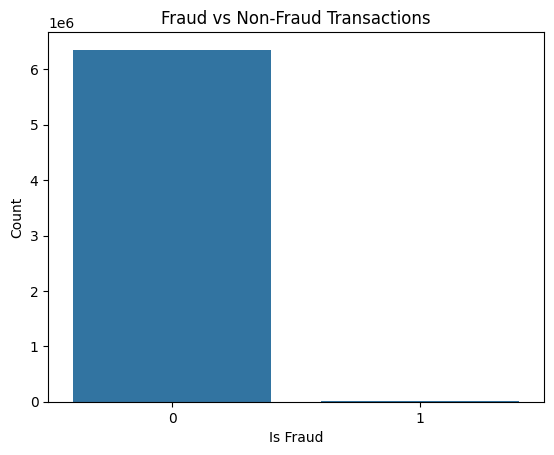

In [ ]:
sns.countplot(x='isFraud', data=dataset)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()


### 3.2 Amount Distribution

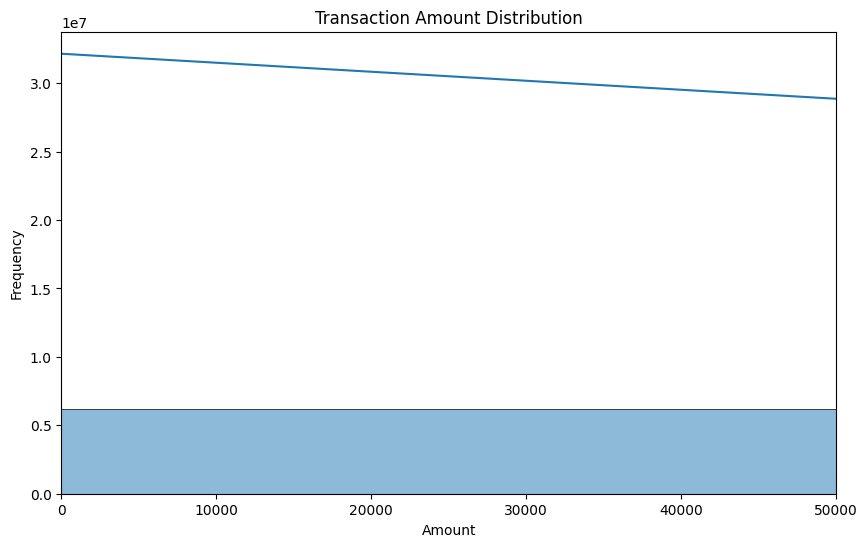

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['amount'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.xlim(0, 50000)  # Optional to focus on smaller transactions
plt.show()


### 3.3 Piechart

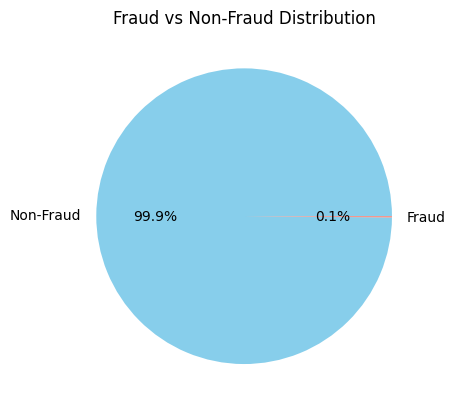

In [54]:
dataset['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'], colors=['skyblue', 'salmon'])
plt.title('Fraud vs Non-Fraud Distribution')
plt.ylabel('')
plt.show()


## 4.Bivariate Analysis- Relation b/w variables

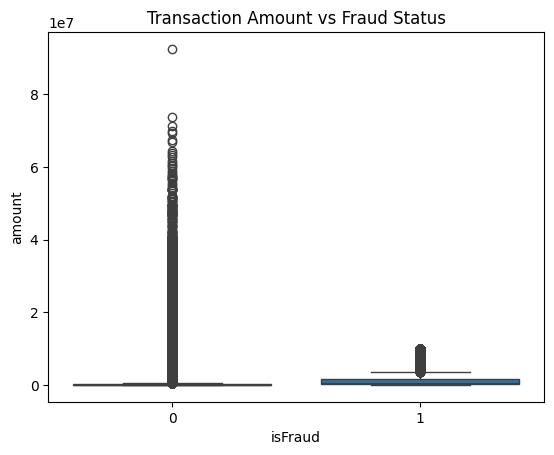

In [ ]:
sns.boxplot(x='isFraud', y='amount', data=dataset)
plt.title("Transaction Amount vs Fraud Status")
plt.show()

### 4.2 Countplot with hue-Categorical v/s Target

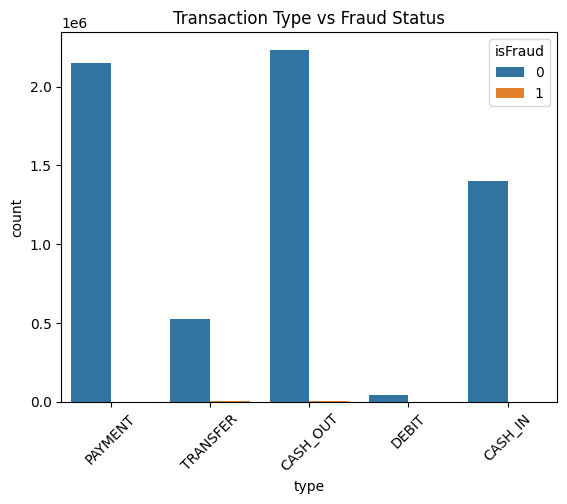

In [55]:
sns.countplot(x='type', hue='isFraud', data=dataset)
plt.title('Transaction Type vs Fraud Status')
plt.xticks(rotation=45)
plt.show()

## 5.Correlation HeatMap

<Figure size 1200x800 with 0 Axes>

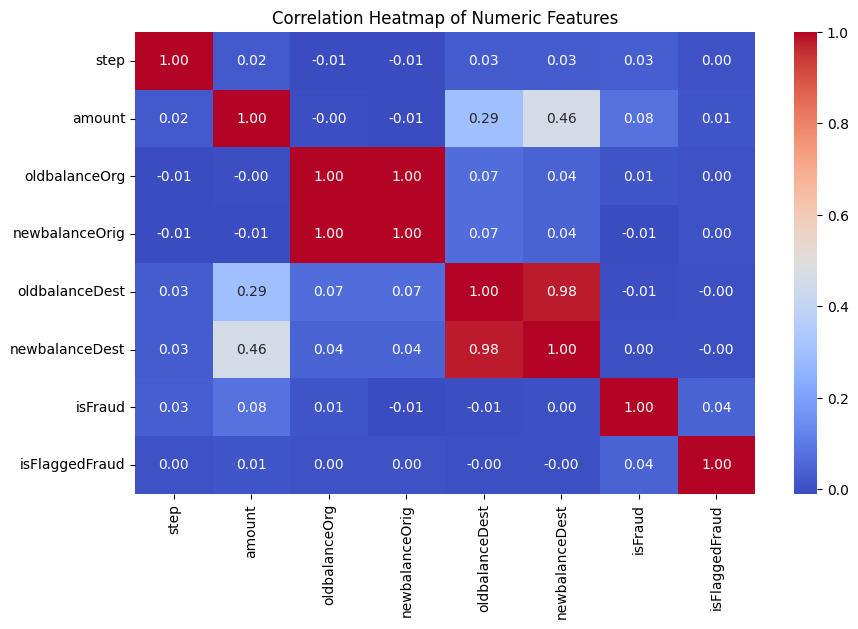

In [51]:
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_data = dataset.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## 6. Descriptive Analysis

In [ ]:
print("\nDescriptive Statistics:")
print(dataset.describe())


Descriptive Statistics:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.0